In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import graphviz
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from konlpy.tag import Kkma
import re

In [65]:
df = pd.read_csv('./result/마켓컬리전처리.csv')
for i in range(len(df)):
    df['nouns'][i] = df['nouns'][i].replace('[','').replace(']','').replace("'",'').replace(' ','').split(',')
for i in range(len(df)):
    if df['nouns'][i] == ['']:
        df.drop([i],inplace=True)
        
df.reset_index(inplace=True)
del df['index']

D:\programfiles\anaconda3\envs\pythonopencv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
stopwords = "./korean_stopwords.txt"
nouns_tagger =Kkma()
def text_cleaning(text):
  hangul = re.compile('[^ ㄱ-ㅣ가-힣]')
  result = hangul.sub('', text)
  tagger = Kkma()
  nouns = nouns_tagger.nouns(result)
  nouns = [x for x in nouns if len(x) >1]
  nouns =[x for x in nouns if x not in stopwords]
  return nouns

vect = CountVectorizer(tokenizer= lambda x : text_cleaning(x))
bow_vect = vect.fit_transform(df['comment'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [66]:
df

,date,comment,ratings,ko_text,nouns,y
0,2021-03-10,긋긋긋 아주좋아여,5,긋긋긋 아주좋아여,[긋긋긋],1
1,2021-03-10,정확한 시간에 배달되어 만족합니다.,4,정확한 시간에 배달되어 만족합니다,"[정확, 배달, 만족]",1
2,2021-03-10,좋아요 만족합니다,4,좋아요 만족합니다,[만족],1
3,2021-03-10,너무 좋습니다ㆍ다양한상품,5,너무 좋습니다다양한상품,"[다양, 상품]",1
4,2021-03-10,후기보기 너무 불편해요. 3월 1일 후기보고 뒤로가기 누르면 3월 10일로 리스트가...,2,후기보기 너무 불편해요 월 일 후기보고 뒤로가기 누르면 월 일로 리스트가 확 올라가...,"[후기보기, 기보기, 불편, 후기, 후기보고, 보고, 가기, 일로, 리스트, 있어요...",0
...,...,...,...,...,...,...
5468,2016-03-02,모바일로 쉽게 살수있어서 좋아요^^,5,모바일로 쉽게 살수있어서 좋아요,[모바일],1
5469,2016-03-02,아이를 키우며 좋은 식자재에 대한 갈증이 있는데 이렇게 건강하고 신선한 먹거리를 ...,5,아이를 키우며 좋은 식자재에 대한 갈증이 있는데 이렇게 건강하고 신선한 먹거리를 ...,"[식자재, 자재, 갈증, 건강, 먹거리, 컴퓨터, 부족, 엄마, 앱이네, 지금, 행...",1
5470,2016-03-02,"아는동생소개로알게된마켓컬리 늦게안게아쉬울정도ㅋㅋ제품퀄리티완젼좋고,포장배송완벽함!내눈...",5,아는동생소개로알게된마켓컬리 늦게안게아쉬울정도ㅋㅋ제품퀄리티완젼좋고포장배송완벽함내눈으로...,"[동생, 소개, 마켓, 정도, 제품, 포장, 완벽, 안보, 퀄리티, 포장배송, 안보...",1
5471,2016-03-02,샛별배송 정말 훌륭합니다. 컬리라면 무조건 믿고 주문~ ^^*,5,샛별배송 정말 훌륭합니다 컬리라면 무조건 믿고 주문,"[샛별, 샛별배송, 배송, 주문]",1


In [67]:
all_words_df = pd.DataFrame()

for n in range(len(df)):
    words = df['nouns'][n]
    words_df = pd.DataFrame()
    for i in words:
        words_df[i] = [1]
        #satisfaction.append(df['ratings'].iloc[i])
    all_words_df = pd.concat([all_words_df, words_df], ignore_index=True)
all_words_df = all_words_df.fillna(0)
all_words_df.head()    

,긋긋긋,정확,배달,만족,다양,상품,후기보기,기보기,불편,후기,...,사용하다,수차례,처제,야식,스크롤등,구세주,갈증,안보고사,고사,족인
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
X = all_words_df
y = df['y'] #
#X = (X - X.min()) / (X.max() - X.min()) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 의사결정

In [70]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.62      0.60      0.61       205
           1       0.91      0.91      0.91       890

    accuracy                           0.85      1095
   macro avg       0.76      0.75      0.76      1095
weighted avg       0.85      0.85      0.85      1095

Test Accuracy: 85.48%


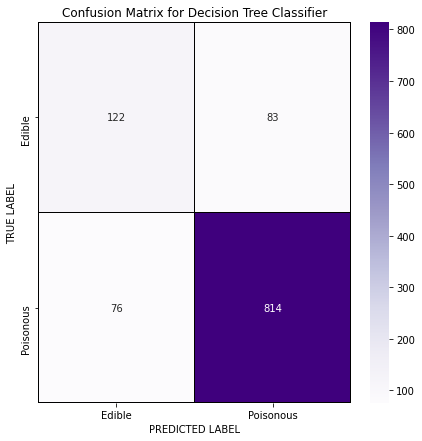

In [72]:
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# 로지스틱회귀

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))




Test Accuracy: 88.95%


In [74]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.83      0.52      0.64       205
           1       0.90      0.98      0.93       890

    accuracy                           0.89      1095
   macro avg       0.86      0.75      0.79      1095
weighted avg       0.88      0.89      0.88      1095



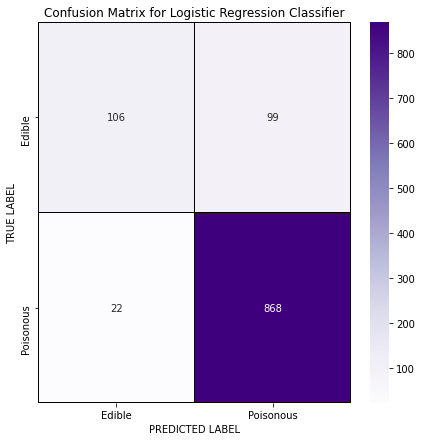

In [75]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [88]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])
coef_pos_index = sorted(((value, index ) for index, value in enumerate(lr.coef_[0])), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse= False)

[(2.1324309687246594, 3), (2.083313398472812, 63), (1.7075105045264207, 33), (1.556881133658669, 73), (1.4361608424839856, 70)]
[(-2.0090281774944807, 198), (-2.0098497171779686, 323), (-2.1244423715797343, 1205), (-2.2017195095654314, 836), (-2.4537035390312694, 22)]


In [90]:
invert_index_vectorizer = {v:k for k,v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100])

NameError: name 'vect' is not defined

In [89]:
for coef in coef_pos_index[:15]:
  print(invert_index_vectorizer[coef[1]], coef[0])

NameError: name 'invert_index_vectorizer' is not defined

In [ ]:
for coef in coef_neg_index[:15]:
  print(invert_index_vectorizer[coef[1]], coef[0])

# KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 98.77%


In [77]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))


KNN Classifier report: 

               precision    recall  f1-score   support

           0       0.76      0.09      0.17       205
           1       0.83      0.99      0.90       890

    accuracy                           0.82      1095
   macro avg       0.79      0.54      0.53      1095
weighted avg       0.81      0.82      0.76      1095



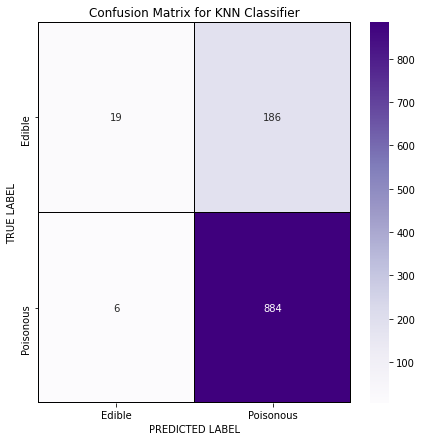

In [78]:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# SVM

In [79]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))


Test Accuracy: 81.28%


In [80]:
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       205
           1       0.81      1.00      0.90       890

    accuracy                           0.81      1095
   macro avg       0.41      0.50      0.45      1095
weighted avg       0.66      0.81      0.73      1095



D:\programfiles\anaconda3\envs\pythonopencv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


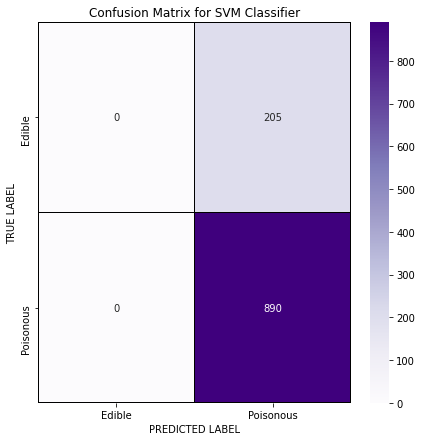

In [81]:
cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# 가우시안


In [82]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))


Test Accuracy: 38.26%


In [83]:
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.21      0.82      0.33       205
           1       0.87      0.28      0.43       890

    accuracy                           0.38      1095
   macro avg       0.54      0.55      0.38      1095
weighted avg       0.75      0.38      0.41      1095



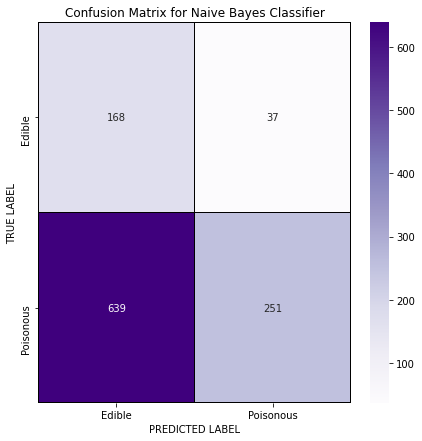

In [84]:
cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# 랜덤포레스트

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 89.22%


In [86]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.78      0.59      0.67       205
           1       0.91      0.96      0.94       890

    accuracy                           0.89      1095
   macro avg       0.85      0.77      0.80      1095
weighted avg       0.89      0.89      0.89      1095



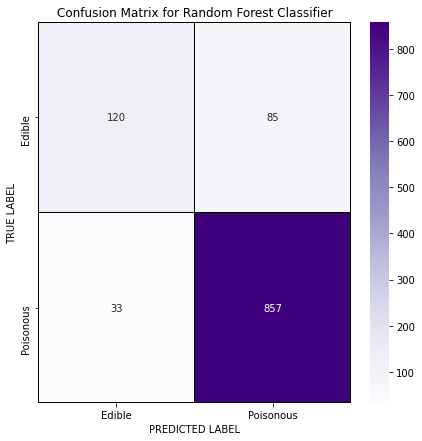

In [87]:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [96]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(lr.coef_[0])), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse= False)

In [94]:
for coef in rf.feature_importances_[:15]:
    print(coef)

1.024630791703909e-06
0.00019381183694913083
0.0007684914613796161
0.005387485796345404
0.002769862038358762
0.005681996543817683
0.0005987709485337879
0.0009383081743586533
0.006299881220892206
0.0012622615118036851
0.000572623389596559
0.001313177642200385
0.0003843109895780094
7.139070465671733e-05
0.000623823724766491


In [124]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])


[(2.1324309687246594, 3), (2.083313398472812, 63), (1.7075105045264207, 33), (1.556881133658669, 73), (1.4361608424839856, 70)]
[(-2.0090281774944807, 198), (-2.0098497171779686, 323), (-2.1244423715797343, 1205), (-2.2017195095654314, 836), (-2.4537035390312694, 22)]


In [121]:
invert_index_vectorizer = {v:k for k,v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100])

{758: '긋긋긋', 4545: '정확', 2950: '시간', 1891: '배달', 1524: '만족', 1045: '다양', 2513: '상품', 6128: '후기보기', 7


In [125]:
for coef in coef_pos_index[:100]:
  print(invert_index_vectorizer[coef[1]])

ㄱㅣ회
ㅠ구매주문
ㅋㅍ은
ㅣ당로또번호
ㅣㅂ
감동생산자
개발
ㅇㅈㅇㅈ
기하
개꿀
과대포
개념
고객대응
개편해
가격옆
개미
ㅊㅓ
게시
구입조건
노동자
날짜제한
가기
구매의사
ㅋㄷㅌㅇ
다이어터
구징도로
과한포장
개최악
대구지역
것만ㅋ빼고
롯데
다비
대략
되니
네트
그로
가야
가관
간편결재
ㅡㅂ족
콘텐츠
개로
ㅊ츄
ㅁㅊ
ㅋㅍ을년
그때
가입자체
하궁
양념민물장어
ㅊㅜ천인
경기권
항생제
만들기
과정
디피
다가
가입미끼
었습ㄴ
경쟁업체
대문의를해
곤란
리어
대문의
내부순환
리예
미지
마크
ㄱㅊ
결제페이지
추가상품구매
추가기능
추가
냉동식품
고향집
광고비최고배우
보내요
기능위시리스트
노릇
사용불가
과채류
건강식품
졸음운전
졸음
존트
새벽시간
앱디자인
튕궈버리
투자
ㅔ크
재발송
건강
영진
마워용
감동예
근디앱
마지막
넘편리
쇼핑앱
다음날새벽
냉동상품


In [127]:
for coef in coef_neg_index[:100]:
  print(invert_index_vectorizer[coef[1]])

ㅉㅉ
깔끙
도안
건의안
감성팔
각자
광고효과
계라
가족건강
너희
안삼
감안
개발자지
겨울
간편식도
기분
대로
강점
개발자분
강추
가상
강츄
마하
기본
개발자님
걱정
가격변동
광주
개비
메인메뉴
드로이드
ㅓ지네
개수
구동
대처
굿굿
관련항목
짜증
동절기
감이
마감시간
도난
꼼수
감시
등등
감수
땀냄새
리등
국내
내상태
공정거래위원회
구매순
굿굿굿
냉팩충이
넘좋드라고
ㅏ앱
조사
ㅓㅇ
경쟁
랭킹판매순
경조정
가상계좌번호
경이
동의
검색기능
법인
공산품
ㅠ마켓컬리어플생겨
ㅠ서버
내일
영해
좋드라고
플있음
멘트
계란포장도
기사
배달직원
맛잇
너겟
가성
그놈
도착시간
하질
간소화
이제
배송가능
안받음
계절
음료
조음
서버
걍좋움
주의문구
겉비닐
아이스포장
결제회사
나사
있습
부유층
각제품
